In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [121]:
def get_hv(file_name):
    with open(file_name) as file:
        hv = []
        
        for line in file:
            hv.append(float(line))
            
    return pd.DataFrame(data=hv, columns=['HV'])

def random_test(df1, df2):
    DORAND = 5000
    
    spread2 = df2.values
    spread1 = df1.values
    
    medianSpreadDiff = np.median(spread2) - np.median(spread1)
    meanSpreadDiff = np.mean(spread2) - np.mean(spread1)
    
    totalSpread = np.append(spread1.tolist(), spread2.tolist())
    
    randMedianSpreadDiff = np.nan * np.ones((DORAND,1))
    randMeanSpreadDiff = np.nan * np.ones((DORAND,1))
    
    for randPool in range(0, DORAND-1):
        new1Index = np.random.permutation(30)
        newSpread1 = totalSpread[new1Index[0:15]]
        newSpread2 = totalSpread[new1Index[15:30]]
        
        randMedianSpreadDiff[randPool] = np.median(newSpread2) - np.median(newSpread1)
        randMeanSpreadDiff[randPool] = np.mean(newSpread2) - np.mean(newSpread1)
        
    randMedianSpreadDiff[DORAND - 1] = medianSpreadDiff
    randMeanSpreadDiff[DORAND - 1] = meanSpreadDiff
    
    z = (meanSpreadDiff - np.mean(randMeanSpreadDiff) )/ np.std(randMeanSpreadDiff)
        
    limiar = 1.96 * np.std(randMeanSpreadDiff) + np.mean(randMeanSpreadDiff)
    
    if z <= -1.96:
        print('H1-')
    elif z >= 1.96:
        print('H1+')
    else:
        print('H0')
    print(limiar)
    print(z)
    
    plt.figure(figsize=(9,6))
    plt.hist(randMeanSpreadDiff,bins=100,color='gray')
    plt.scatter(x=z,y=0,color='red')
    plt.scatter(x=limiar,y=0,color='black')
    plt.scatter(x=-limiar,y=0,color='black')
    plt.xticks(fontsize=(20))
    plt.yticks(fontsize=(18))
    plt.show()

In [119]:
nsga = get_hv('nsga_hv_values_norm.txt')
moead = get_hv('dbscan_hv_values_norm.txt')

H0
0.00672725816108
-0.0311838505199


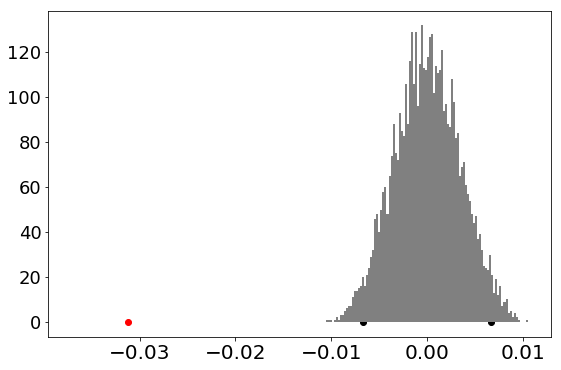

In [120]:
random_test(nsga,moead)